# Disease Prediction from Medical Data
This notebook demonstrates building classification models to predict the likelihood of a disease using the Breast Cancer dataset from `sklearn.datasets`. The steps include data loading, EDA, preprocessing, model training, evaluation, and conclusions.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## 2. Load Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 3. Exploratory Data Analysis

Dataset shape: (569, 31)
target
1    357
0    212
Name: count, dtype: int64


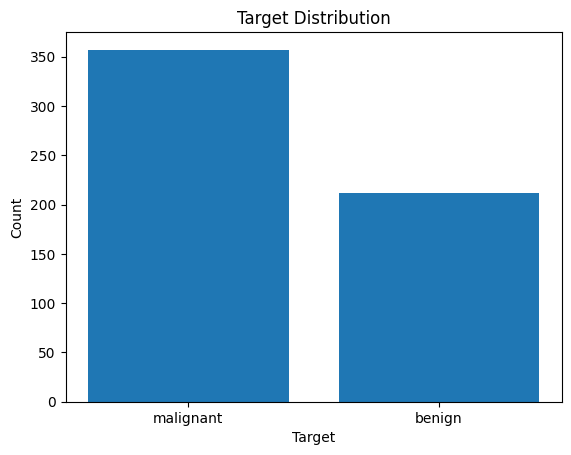

In [ ]:

print(f"Dataset shape: {df.shape}")
counts = df['target'].value_counts()
print(counts)


plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.xticks(counts.index.astype(str), data.target_names)
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## 4. Data Preprocessing

In [ ]:

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Modeling

In [ ]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': acc,
        'report': classification_report(y_test, y_pred, target_names=data.target_names),
        'cm': confusion_matrix(y_test, y_pred)
    }
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9825
Random Forest Accuracy: 0.9561
SVM Accuracy: 0.9825


## 6. Evaluation


Logistic Regression Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



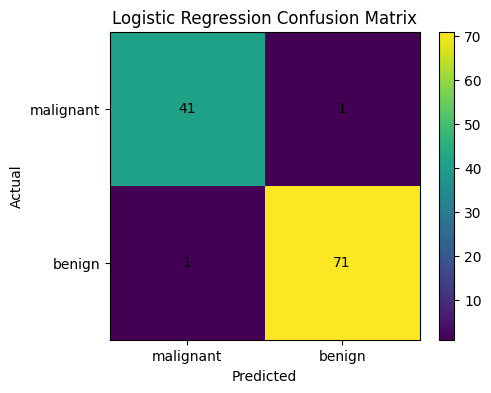


Random Forest Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



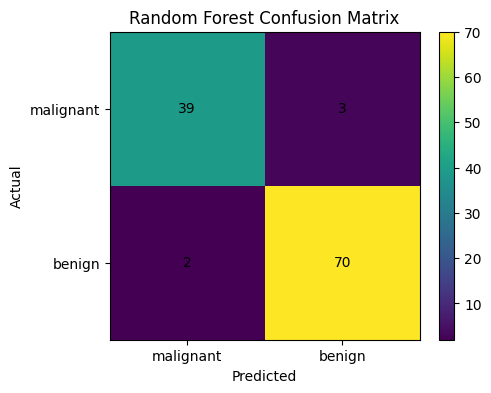


SVM Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



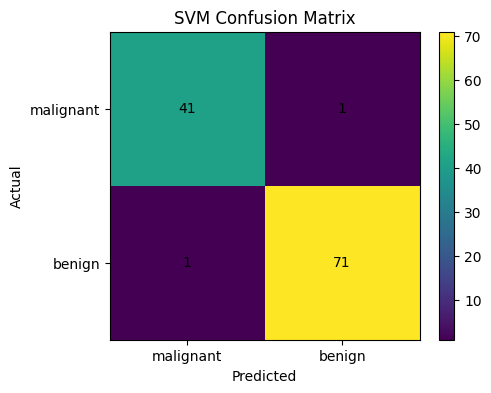

In [6]:
for name, res in results.items():
    print(f"\n{name} Classification Report:\n", res['report'])
    cm = res['cm']
    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation='nearest', aspect='auto')
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(data.target_names))
    plt.xticks(tick_marks, data.target_names)
    plt.yticks(tick_marks, data.target_names)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()